<div class="alert alert-info" style="background-color:#0B3A42">
    <h1 align="center"><b>Linear Regression</b></h1> 
    <h3 align="center"> Machine Learning Course (July 2021)</h3>
    <h5 align="center">Mahmoud Ghazi</h5>
</div>

we start linear regression by an easy example

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
# Boston = load_boston()
# boston = pd.DataFrame(data=Boston.data, columns=[Boston.feature_names])
# boston.columns


#### Predict the price of house(y) according to independance variables (x) is a simple problem of linear regression
* dependant variable(y) is continuous 

In [4]:
def load_data(fname='data/ex1data1.txt'):
    data = np.genfromtxt(fname, delimiter=',')
    n = data.shape[1] - 1            # number of features
    X = data[:, :-1].reshape(-1, n)  # Get all but the last column and convert to a 2d array
    y = data[:,  -1].reshape(-1, 1)  # Get the last column and convert to a 2d array

#     num = 30                                                              
#     X = np.linspace(50,1000,num=num).reshape(-1, n)
#     y = 10*X  +  np.random.uniform(low=0, high=10000, size=(num,)).reshape(-1, 1)

    return X, y
# x, y = load_data("../Machine_Learning_2018/Assignments/Assignment1/data/ex1data1.txt")


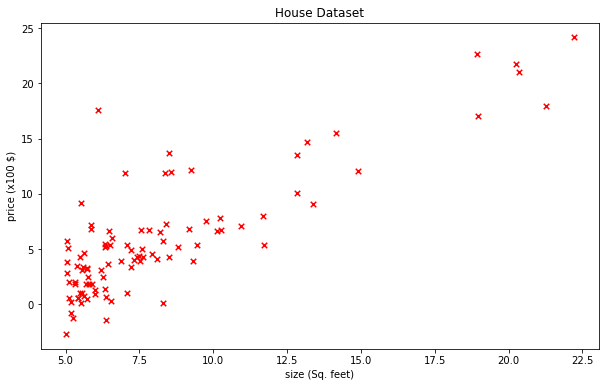

In [5]:
# rand(d0, d1, …, dn)	Random values in a given shape.
# randn(d0, d1, …, dn)	Return a sample (or samples) from the “standard normal” distribution.
# randint(low[, high, size, dtype])	Return random integers from low (inclusive) to high (exclusive).
# random_integers(low[, high, size])	Random integers of type np.int between low and high, inclusive.
# random_sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# random([size])	Return random floats in the half-open interval [0.0, 1.0).
# ranf([size])	Return random floats in the half-open interval [0.0, 1.0).
# sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# choice(a[, size, replace, p])	Generates a random sample from a given 1-D array
# bytes(length)	Return random bytes.
num = 30                                                              
x = np.linspace(50,1000,num=num)
y = 10*x  +  np.random.uniform(low=0, high=10000, size=(num,))

x, y = load_data("../Machine_Learning_2018/Assignments/Assignment1/data/ex1data1.txt")


plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, c='r', marker='x')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.show()

In [6]:
# cc=np.array([1,2,3,4])
# cc[None,:]+cc[:,None]
# np.broadcast_to(cc[None,:],(4,4))+np.broadcast_to(cc[:,None],(4,4))


#### The simplest hypothesis for linear regression

## $$ h_\theta(x) = \theta_0 + \theta_1 x $$
* $ \theta_0 , \theta_1 $ are parameters which $ \theta_0 $ is an intercept and $ \theta_1 $ is slope 


In [7]:
# calculate hypothesis
def hyp(tet0, tet1, x):  
    return tet0 + tet1 * x

visualizing how change the slope can change the error

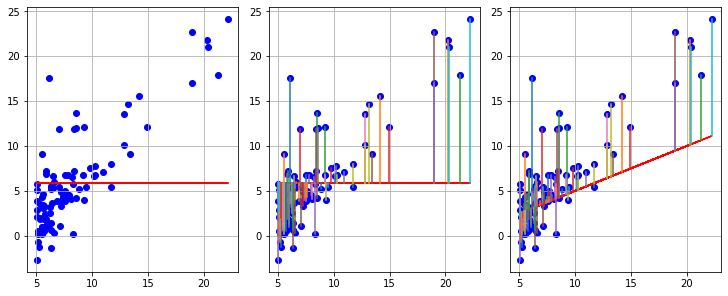

In [8]:
y_1 = np.ones_like(y) * y.mean()

fig = plt.figure(constrained_layout=True, figsize=(10,4))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0,0])
ax1 = fig.gca()
ax1.scatter(x,y,c='b');
ax1.plot(x,  y_1, color='r');
plt.grid()

ax2 = fig.add_subplot(grid[0,-2])
ax2.scatter(x,y,c='b');
ax2.plot(x,  y_1, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_1[i]))
plt.grid()

y_2 = .5*x
ax3 = fig.add_subplot(grid[0,-1])
ax3.scatter(x,y,c='b');
ax3.plot(x,  y_2, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_2[i]))
plt.grid()

#### Error for one sample is the distance between each dot to line:    $ h_\theta(x) - y_i $
<font color="blue">  <b>COST FUNCTION</b> (Sumation of all squared errors) : </font>
### $$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2 $$

#### Lets draw the cost function

if  $ \theta_0=0 $

Then we have : $ h_\theta(x) = \theta_1 x_i $

if we calculate the cost function $\frac{1}{2}\sum_{i=1}^n(\theta_1 x_i  - y_i)^2 $ for different $\theta_1 $ and plot it, we have:

In [9]:
#calculate the cost function (mean squared error)
def mse(y_pred, y):
    return 0.5 * ((y_pred - y) ** 2).mean()

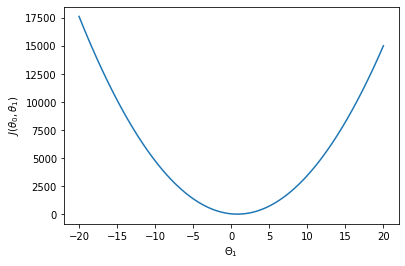

In [10]:
# Randomly determine theta_1
j=[]
theta_1=[]
theta = np.linspace(-20,20,num=100)
for t in theta:
    y_pred = hyp(0,t,x)
    a = mse(y_pred,y)
    j.append(a)
    theta_1.append(t)

plt.plot(theta_1,j)
plt.xlabel(r'$\Theta_1$')
plt.ylabel(r'$J(\theta_0,\theta_1)$');

### Normalization

In [11]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
# print(xn)
xn = x

## Goal
#### Above figure turn to a 3-dimension plate if $\theta_0$ was determined (the figure of 3d plate will be shown later in this project). In order to find a best hypothesis(line) we should minimize the cost function, by which we can find the best parameters

### $$minimize  J(\theta_0 , \theta_1)$$

## <font color='blue'>Gradient descent</font>
After Randomly determine $\theta_0 , \theta_1$  and calculate cost function, Now we should find a direction to move and minimize this function. This direction explain with gradient in math.

$$
\nabla J_\theta=\left[\begin{array}{c}
\dfrac{\partial J}{\partial \theta_0}\\
\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$
we should move against this direction $ (-\nabla)$

## <font color='blue'>Updating</font>
### $$\theta_(new) = \theta_(old) + \alpha(-\nabla J_\theta)$$
$\alpha$ is step size. it is called hyperparameter and is a viatal learning rate

$$
\left[\begin{array}{c}
\theta_0 \\
\theta_1 
\end{array}\right]=\left[\begin{array}{c}
\theta_0\\
\theta_1  
\end{array}\right] + \alpha
\left[\begin{array}{c}
-\dfrac{\partial J}{\partial \theta_0}\\
-\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$

#### we can write J partial derivative in this way
for J=0
$$  
\theta_0 = \theta_0 - \alpha \dfrac{\partial}{\partial \theta_0}J(\theta_0 , \theta_1)
$$

for J=1
$$  
\theta_1 = \theta_1 - \alpha \dfrac{\partial}{\partial \theta_1}J(\theta_0 , \theta_1)
$$

cost function: $$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^m(h_\theta(x_i) - y_i)^2$$

$$  
\dfrac{\partial J}{\partial \theta} = \sum_{i=1}^m (h_\theta(x_i) - y_i) x_i
$$
substitute the partial in update $$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$


##### with considering $ h_\theta(x) = \theta_0 + \theta_1 x $ and after partial derivative we have:
for J=0
$$  
\theta_0 = \theta_0 - \alpha \sum_{i=1}^m h_\theta(x_i) - y_i
$$

for J=1
 $$  
\theta_1 = \theta_1 - \alpha \sum_{i=1}^m (h_\theta(x_i) - y_i) x_i
$$

### $\theta_0 and \theta_1$ should be synchoronized their update, if we update it by sequence the result will be wrong
### we continue repeating the calculation of $\theta_0 and \theta_1$ (updating) untill we reach convergence, it means that the differece of cost functions $J(\theta)$ after a repeat reach below 0.001 

In [12]:


# def update(theta_0,theta_1,X,alpha):
#     """
#     calculate update for unvectorized gradient descent
#     it does not use in practical
#     """
#     # predict 
#     y_pred = hyp(theta_0, theta_1, xn)
#     costs = mse(y_pred, y)
    
# #     # compute gradients
# #     term = y_pred - y
# #     dtheta_1 = xn * term
    
# #     # update parameters
# #     theta_0 -= alpha * term.mean()
# #     theta_1 -= alpha * dtheta_1.mean()
    
#     term = hyp(theta_0, theta_1, X) - y
#     # update thetas
#     theta_0 -= alpha * term.mean()
#     theta_1 -= alpha * (term * X).mean()
    
# #     theta = theta - (alpha*(1/m)*(E.T@X)).T

    
#     return theta_0,theta_1,costs


In [13]:
# in order to find the best alpha we should repeat the algorithm for several times
choose_alpha = .0001
alpha_range=[]
while choose_alpha<1:
    alpha_range.append(choose_alpha)
    al = choose_alpha*3
    choose_alpha = round(al,5)
print(len(alpha_range),alpha_range)
    

9 [0.0001, 0.0003, 0.0009, 0.0027, 0.0081, 0.0243, 0.0729, 0.2187, 0.6561]


In [14]:
def gradient_descent_unvec(X, y, theta,alpha):

    alpha_cost=[]
    thetas_cost = np.empty((0,4))
    cnt=0
    t0,t1 = theta[0,0],theta[1,0]
    cost_all=[]
    while True:
        
        hypthesis = hyp(t0,t1, X)
        cost = mse(hypthesis, y)
        
        term = hypthesis - y
        t0 -= alpha * term.mean()
        t1 -= alpha * (term * X).mean()
    
        cost_all.append(cost)
        cnt+=1
        try:
            diff = cost_all[-2] - cost_all[-1]
            if diff <0.001:
                print(f'with alpha= {alpha} in {cnt} time reaches the minimum')
                break
        except:
            pass
    return (t0,t1),cost_all

In [47]:
a,b =np.ones((3, 1)), np.array([1,2,3])[:,None]
# X = np.c_[a,b]
f = np.concatenate((a,b),axis=1)
f.shape

(3, 2)

In [51]:
# we need to initialize parameters randomly
theta = np.random.randn(2, 1)
print(theta.shape)


# X = np.c_[np.ones((x.shape[0], 1)), x]
alpha = .01

alpha_thetas_cost=[]
alpha_cost=[]
alpha_theta=[]

for alpha in alpha_range:

    theta_ ,cost_alla= gradient_descent_unvec(x, y, theta, alpha)
    alpha_cost.append((alpha,cost_alla))
    alpha_theta.append((alpha,theta_))


(2, 1)
with alpha= 0.0001 in 291 time reaches the minimum
with alpha= 0.0003 in 124 time reaches the minimum
with alpha= 0.0009 in 56 time reaches the minimum
with alpha= 0.0027 in 835 time reaches the minimum
with alpha= 0.0081 in 656 time reaches the minimum
with alpha= 0.0243 in 832 time reaches the minimum
with alpha= 0.0729 in 2 time reaches the minimum
with alpha= 0.2187 in 2 time reaches the minimum
with alpha= 0.6561 in 2 time reaches the minimum


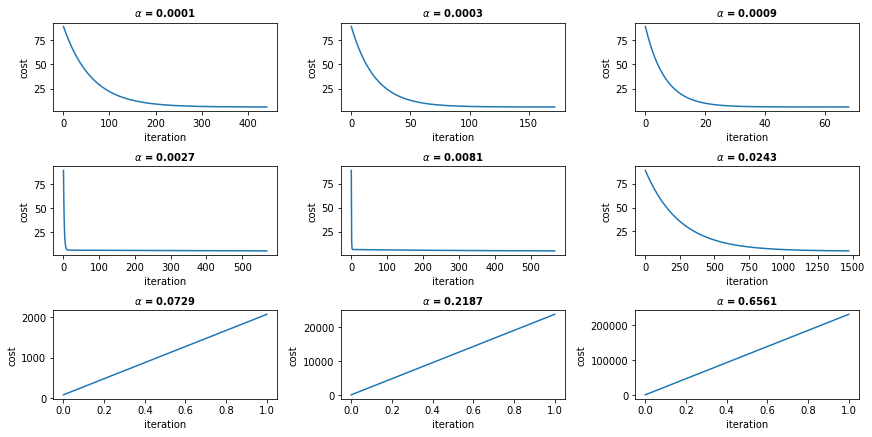

In [17]:
def set_axs(axs,N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
  
plot_number = len(alpha_cost)
fig, axs = plt.subplots(6,3, figsize=(12,10), constrained_layout=True)
axs = set_axs(axs,plot_number)
for alpha,ax in zip(alpha_cost,axs):
    ax.plot(alpha[1])
    ax.set_title(r'$\alpha$ = {}'.format(alpha[0]),fontweight='bold',size=10)
    ax.set_xlabel('iteration')
    ax.set_ylabel('cost')    

### The descent ternd in cost function plot shows wev'e been on a right path and the <font color='red'>learning rate $(\alpha)$ </font>was suitable because by repeating the algorithm the cost has benndecreased.
### in order to find a right hyperparameter $\alpha$ we should first consider a value for it and then repeat all process untill this step and increase and decrease it according to output plot.

### we can see that in $\alpha = 0.0243 $ we reach convergence with a good slope

## Important point
In linear regression if we use gradient descent algorithem and we reach convergence, be insure that we have one global optimum because our cost function is convex.

### Animate

In [18]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
t0,t1 = theta[0,0],theta[1,0]

y_pred = hyp(t0,t1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

alpha= 0.0243

# t0,t1 = theta_0,theta_1
def animate(i):
    global t0,t1 
    line.set_ydata(hyp(t0, t1, x))
    for i in range(100): 
#         t0,t1,cost = update(t0,t1,alpha= 0.0243)
        
        hypthesis = hyp(t0,t1, x)
#         cost = mse(hypthesis, y)
        
        term = hypthesis - y
        t0 -= alpha * term.mean()
        t1 -= alpha * (term * x).mean()
    return line

anim = animation.FuncAnimation(fig, animate, np.arange(0, 21), interval=200, repeat_delay=1000)

In [19]:
anim

In [20]:
for alpha,theta in alpha_theta:
    if alpha==0.0243:
        print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta[0], theta[1]))
        theta_0, theta_1 = theta[0], theta[1]

 theta_0 =   -3.88
 theta_1 =    1.27


## Prediction

In [21]:
x_test = 1750

In [22]:
x_test_n = (x_test - mu) / sigma

In [23]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [24]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [25]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [26]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [27]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [28]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [29]:
y_test = hyp(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 570.82 $


In [30]:
theta0 = np.linspace(-20,20, 100)
theta1 = np.linspace(-6,6, 100)

J_ = np.zeros((len(theta0), len(theta1)), dtype=np.float64)

# use enumerate to address the coordination of J according to theta0 and theta1
for i, v0 in enumerate(theta0):
    for j, v1 in enumerate(theta1):
        y_pred = hyp(theta0[i],theta1[j],x)
        J_[i, j] =mse(y_pred,y)


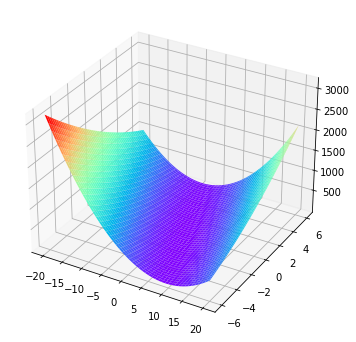

In [31]:
X, Y = np.meshgrid(theta0, theta1)

# plot cost function
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, J_, cmap=plt.cm.rainbow)
plt.show()

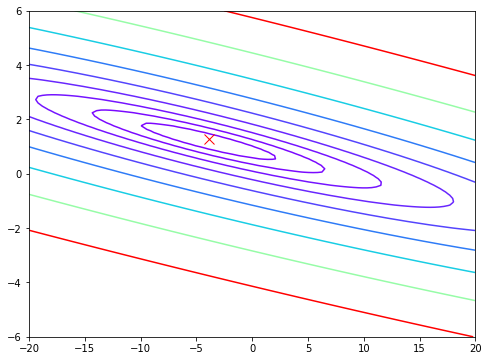

In [32]:
# plot contours of cost function and the final value of parameters
fig = plt.figure(figsize=(8, 6))
plt.contour(X, Y, J_.T, np.logspace(-2, 3, 20), cmap=plt.cm.rainbow)
plt.plot(theta_0, theta_1, 'rx', markersize=10)
plt.show()